1. Import the libraries and data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('KAG_conversion_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


2. Dummy encode any categorical and object values and save data to variable X

In [23]:
dummy = list(df.select_dtypes(include = ['category','object']))
dummy

['age', 'gender']

In [26]:
X = pd.get_dummies(df, columns = dummy)

3. Use a heat map to show correlation

a) Drop first 4 columns in df X

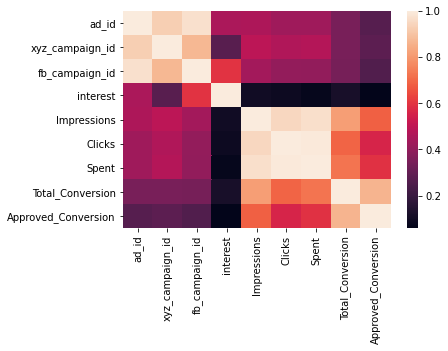

In [28]:
sns.heatmap(df.corr())

In [29]:
X.columns


Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'interest', 'Impressions',
       'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion',
       'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49', 'gender_F',
       'gender_M'],
      dtype='object')

In [33]:
X = X[['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion','age_30-34','age_35-39','age_40-44','age_45-49','gender_F','gender_M']]
X

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,7350,1,1.430000,2,1,1,0,0,0,0,1
1,17861,2,1.820000,2,0,1,0,0,0,0,1
2,693,0,0.000000,1,0,1,0,0,0,0,1
3,4259,1,1.250000,1,0,1,0,0,0,0,1
4,4133,1,1.290000,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1129773,252,358.189997,13,2,0,0,0,1,1,0
1139,637549,120,173.880003,3,0,0,0,0,1,1,0
1140,151531,28,40.289999,2,0,0,0,0,1,1,0
1141,790253,135,198.710000,8,2,0,0,0,1,1,0


b) Based on the heat map why were the columns droppped

The columns were removed because they doon't provide much information relating to other columns

4. Using elbow method:

a) Determine best no of clusters in range of 2 to 20

b)Include graphical plot for elbow curve

Text(0.5, 1.0, 'Cluster No')

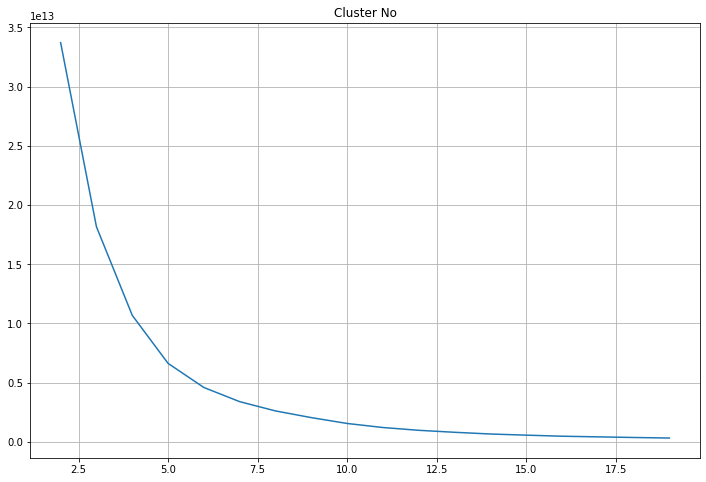

In [37]:
from sklearn.cluster import KMeans

X = X
dist = []

for k in range(2,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    dist.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(12,8))
plt.plot(range(2,20),dist)
plt.grid(True)
plt.title('Cluster No')

5. Based on result of 4b use elbow point to cluster values in df X 

6. Use the model to predict labes from data and save in variable y_means

In [39]:
kmeans = KMeans(n_clusters = 5,random_state=0)

kmeans.fit(X)
y_means = kmeans.predict(X)

7. Add value in y_means to original df as column 'Advert_Type'

In [40]:
df['Advert_Type'] = y_means
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,2
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,2
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,2
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,2
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,1
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,4
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,4


8. Using any form of distribution of choice and original df plot 2 graphs

a) Which advert type leads to highest and consistent amount of sales by all customer age brackets

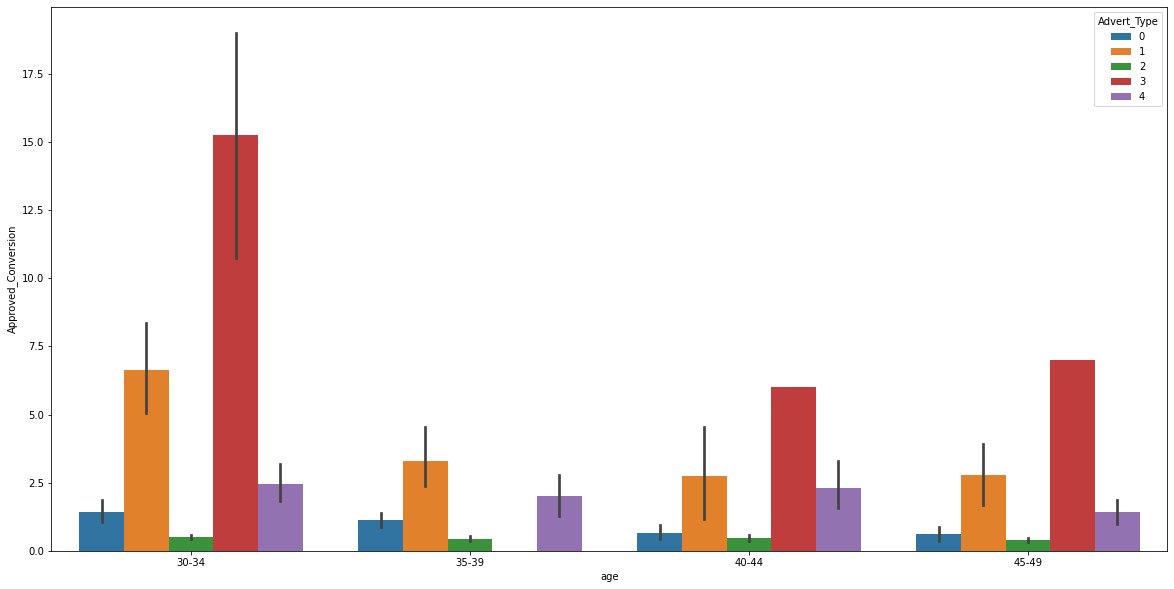

In [45]:
plt.gcf().set_size_inches(20,10,forward=True)
sns.barplot(x = 'age',y='Approved_Conversion',data=df,hue='Advert_Type')

b)Does the company have gender bias in ad spending? Are products gender neutral

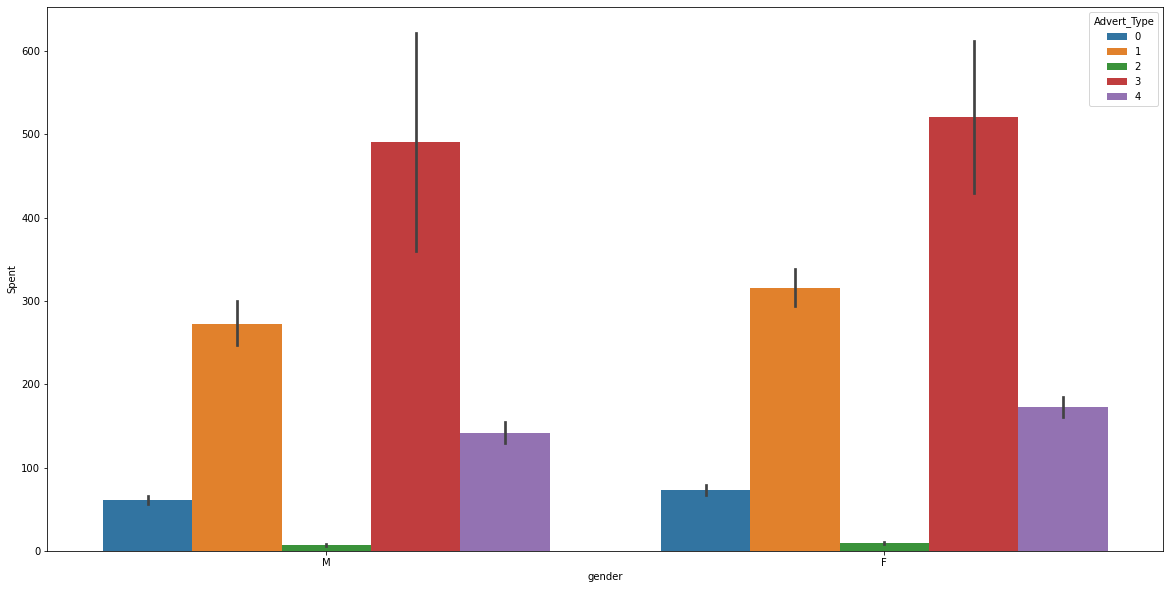

In [46]:
plt.gcf().set_size_inches(20,10,forward=True)
sns.barplot(x='gender',y='Spent',data=df,hue='Advert_Type')